In [152]:
import pandas as pd
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

import decimal
from decimal import Decimal, getcontext

### Example 1 function:

$$
f(x) = x^3 + x - 1 = 0
$$

In [117]:
def f(x):
    return x ** 3. + x - 1.

In [118]:
r, out = optimize.brentq(f=f, 
                         a=0, 
                         b=1., 
                         args=(), 
                         xtol=1e-15, 
                         rtol=1e-15, 
                         maxiter=100, 
                         full_output=True, 
                         disp=True)
print(r, '\n', out)

0.6823278038280194 
       converged: True
           flag: converged
 function_calls: 10
     iterations: 9
           root: 0.6823278038280194
         method: brentq


In [120]:
def g1(x):
    return 1. - x ** 3.
    
def g2(x):
    return (1. - x) ** (1./3.)
    
def g3(x):
    return (1. + 2. * x ** 3.) / (1. + 3. * x ** 2.)
    
def fpi(g, x0, max_iter):
    xt = x0
    list_xt = []
    list_xt.append(xt)
    for i in range(max_iter):    
        xt = g(xt)
        list_xt.append(xt)
    return list_xt

df = pd.DataFrame({
    'G1': np.abs(np.asarray(fpi(g1, .5, 20)) - r),
    'G2': np.abs(np.asarray(fpi(g2, .5, 20)) - r),
    'G3': np.abs(np.asarray(fpi(g3, .5, 20)) - r)})
print(df)


          G1        G2            G3
0   0.182328  0.182328  1.823278e-01
1   0.192672  0.111373  3.195791e-02
2   0.352250  0.091448  8.519197e-04
3   0.281710  0.060036  6.194766e-07
4   0.578274  0.046018  3.276268e-13
5   0.316546  0.031473  1.110223e-16
6   0.678952  0.023322  0.000000e+00
7   0.317672  0.016305  1.110223e-16
8   0.682328  0.011879  0.000000e+00
9   0.317672  0.008401  1.110223e-16
10  0.682328  0.006069  0.000000e+00
11  0.317672  0.004318  1.110223e-16
12  0.682328  0.003105  0.000000e+00
13  0.317672  0.002216  1.110223e-16
14  0.682328  0.001590  0.000000e+00
15  0.317672  0.001137  1.110223e-16
16  0.682328  0.000815  0.000000e+00
17  0.317672  0.000583  1.110223e-16
18  0.682328  0.000418  0.000000e+00
19  0.317672  0.000299  1.110223e-16
20  0.682328  0.000214  0.000000e+00


### Example 2 function:

$$
f(x) := \cos(x) - \sin(x), \qquad g(x) := x + \cos(x) - \sin(x)
$$

In [121]:
def f(x):
    return np.cos(x) - np.sin(x)
def g(x):
    return x + f(x)

In [122]:
r, out = optimize.brentq(f=f, 
                         a=0, 
                         b=3., 
                         args=(), 
                         xtol=1e-15, 
                         rtol=1e-15, 
                         maxiter=100, 
                         full_output=True, 
                         disp=True)
print(r,'\n', out)

0.7853981633974483 
       converged: True
           flag: converged
 function_calls: 9
     iterations: 8
           root: 0.7853981633974483
         method: brentq


In [123]:
def fpi(g, x0, max_iter):
    xt = x0
    list_xt = []
    for i in range(max_iter):    
        xt = g(xt)
        list_xt.append(xt)
    return list_xt

def bisect(f, a, b, tol=1e-15, max_iter=100):
    if f(a) * f(b) > 0:
        raise ValueError("f(a) and f(b) must have opposite signs")
    list_xt = []
    for i in range(max_iter):
        mid = (a + b) / 2.0
        list_xt.append(mid)
        if abs(f(mid)) < tol:
            return list_xt
        if f(a) * f(mid) < 0:
            b = mid
        else:
            a = mid
        if abs(b - a) < tol:
            return list_xt
    return list_xt

In [124]:
df = pd.DataFrame({
    'FPI': np.abs(np.asarray(fpi(g, .0, 30)) - r),
    'Bisect': np.abs(np.asarray(bisect(f, a=.0, b=1., tol=1e-15, max_iter=30)) - r)})
print(df)

             FPI        Bisect
0   2.146018e-01  2.853982e-01
1   8.656684e-02  3.539816e-02
2   3.570431e-02  8.960184e-02
3   1.477848e-02  2.710184e-02
4   6.120688e-03  4.148163e-03
5   2.535218e-03  1.147684e-02
6   1.050118e-03  3.664337e-03
7   4.349727e-04  2.419134e-04
8   1.801716e-04  1.711212e-03
9   7.462951e-05  7.346491e-04
10  3.091256e-05  2.463679e-04
11  1.280440e-05  2.227228e-06
12  5.303756e-06  1.198431e-04
13  2.196888e-06  5.880793e-05
14  9.099807e-07  2.829035e-05
15  3.769263e-07  1.303156e-05
16  1.561280e-07  5.402167e-06
17  6.467034e-08  1.587470e-06
18  2.678733e-08  3.198789e-07
19  1.109568e-08  6.337954e-07
20  4.595979e-09  1.569582e-07
21  1.903717e-09  8.146034e-08
22  7.885453e-10  3.774895e-08
23  3.266262e-10  2.185570e-08
24  1.352930e-10  7.946627e-09
25  5.604017e-11  6.954534e-09
26  2.321265e-11  4.960468e-10
27  9.614975e-12  3.229244e-09
28  3.982703e-12  1.366598e-09
29  1.649569e-12  4.352758e-10


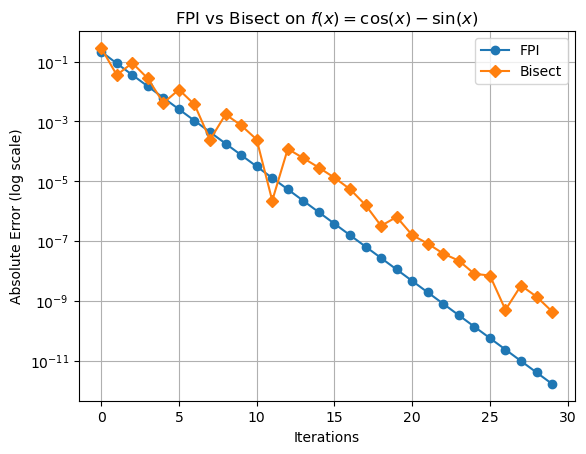

In [125]:
plt.plot(df.index, df['FPI'], label='FPI', marker='o')
plt.plot(df.index, df['Bisect'], label='Bisect', marker='D')
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel('Absolute Error (log scale)')
plt.title(r'FPI vs Bisect on $f(x)=\cos(x) -\sin(x)$')
plt.legend()
plt.grid(True)
plt.show()

In [126]:
def f(x):
    return 1.8 * x - x ** 2.
def g(x):
    return x + f(x)

r, out = optimize.brentq(f=f, 
                         a=1., 
                         b=2., 
                         args=(), 
                         xtol=1e-15, 
                         rtol=1e-15, 
                         maxiter=100, 
                         full_output=True, 
                         disp=True)
print(r,'\n', out)

1.8 
       converged: True
           flag: converged
 function_calls: 8
     iterations: 7
           root: 1.8
         method: brentq


         FPI        Bisect
0   1.530000  3.000000e-01
1   1.116900  5.000000e-02
2   0.353946  7.500000e-02
3   0.157879  1.250000e-02
4   0.151229  1.875000e-02
5   0.098113  3.125000e-03
6   0.088117  4.687500e-03
7   0.062729  7.812500e-04
8   0.054118  1.171875e-03
9   0.040366  1.953125e-04
10  0.033922  2.929687e-04
11  0.025987  4.882812e-05
12  0.021465  7.324219e-05
13  0.016711  1.220703e-05
14  0.013648  1.831055e-05
15  0.010732  3.051758e-06
16  0.008701  4.577637e-06
17  0.006885  7.629395e-07
18  0.005555  1.144409e-06
19  0.004413  1.907349e-07
20  0.003550  2.861023e-07
21  0.002828  4.768372e-08
22  0.002270  7.152557e-08
23  0.001811  1.192093e-08
24  0.001452  1.788139e-08
25  0.001160  2.980232e-09
26  0.000929  4.470348e-09
27  0.000742  7.450580e-10
28  0.000594  1.117587e-09
29  0.000475  1.862646e-10


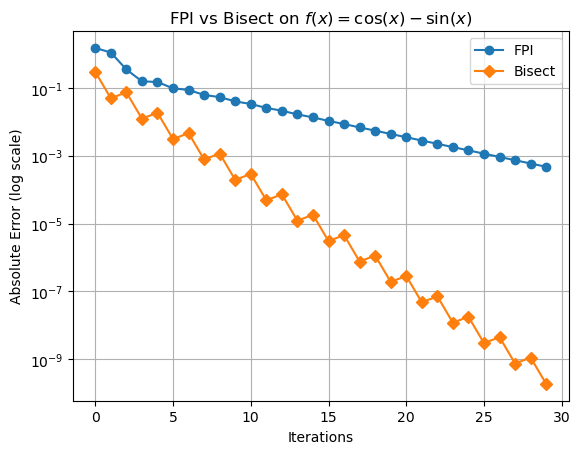

In [128]:
df = pd.DataFrame({
    'FPI': np.abs(np.asarray(fpi(g, .1, 30)) - r),
    'Bisect': np.abs(np.asarray(bisect(f, a=1., b=2., tol=1e-15, max_iter=30)) - r)})
print(df)
plt.plot(df.index, df['FPI'], label='FPI', marker='o')
plt.plot(df.index, df['Bisect'], label='Bisect', marker='D')
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel('Absolute Error (log scale)')
plt.title(r'FPI vs Bisect on $f(x)=\cos(x) -\sin(x)$')
plt.legend()
plt.grid(True)
plt.show()

In [129]:
def f(x):
    return x - np.cos(x)
def g(x):
    return np.cos(x)

r, out = optimize.brentq(f=f, 
                         a=0., 
                         b=2., 
                         args=(), 
                         xtol=1e-15, 
                         rtol=1e-15, 
                         maxiter=100, 
                         full_output=True, 
                         disp=True)
print(r,'\n', out)

0.7390851332151607 
       converged: True
           flag: converged
 function_calls: 8
     iterations: 7
           root: 0.7390851332151607
         method: brentq


In [138]:
xt = fpi(g, 1., 50)
et = np.abs(np.asarray(xt) - r)
ratios = np.zeros_like(et)
ratios[1:] = et[1:] / et[:-1]
df = pd.DataFrame({
    'xt': xt,
    'et': et,
    'ratios': ratios})
print(df)

          xt            et    ratios
0   0.540302  1.987828e-01  0.000000
1   0.857553  1.184681e-01  0.595967
2   0.654290  8.479534e-02  0.715765
3   0.793480  5.439523e-02  0.641488
4   0.701369  3.771636e-02  0.693376
5   0.763960  2.487455e-02  0.659516
6   0.722102  1.698271e-02  0.682734
7   0.750418  1.133263e-02  0.667304
8   0.731404  7.681091e-03  0.677785
9   0.744237  5.152222e-03  0.670767
10  0.735605  3.480393e-03  0.675513
11  0.741425  2.339953e-03  0.672325
12  0.737507  1.578243e-03  0.674476
13  0.740147  1.062202e-03  0.673029
14  0.738369  7.159291e-04  0.674004
15  0.739567  4.820690e-04  0.673347
16  0.738760  3.248133e-04  0.673790
17  0.739304  2.187592e-04  0.673492
18  0.738938  1.473765e-04  0.673693
19  0.739184  9.926656e-05  0.673558
20  0.739018  6.687079e-05  0.673649
21  0.739130  4.504331e-05  0.673587
22  0.739055  3.034247e-05  0.673629
23  0.739106  2.043871e-05  0.673601
24  0.739071  1.376792e-05  0.673620
25  0.739094  9.274164e-06  0.673607
2

In [148]:
def f(x):
    return x ** 3. + x - 1.
    
def grad_f(x):
    return 3. * x ** 2. + 1.
    
def newton(f, grad_f, x0, max_iter):
    xt = x0
    list_xt = []
    for i in range(max_iter):    
        xt = xt - f(xt) / grad_f(xt)
        list_xt.append(xt)
    return list_xt

In [149]:
r, out = optimize.brentq(f=f, 
                         a=0., 
                         b=2., 
                         args=(), 
                         xtol=1e-15, 
                         rtol=1e-15, 
                         maxiter=100, 
                         full_output=True, 
                         disp=True)
print(r, '\n', out)

0.6823278038280193 
       converged: True
           flag: converged
 function_calls: 11
     iterations: 10
           root: 0.6823278038280193
         method: brentq


In [151]:
xt = newton(f, grad_f, -0.7, max_iter=5)
et = np.abs(np.asarray(xt) - r)
ratios = np.zeros_like(et)
ratios[1:] = et[1:] / et[:-1] ** 2.
df = pd.DataFrame({
    'xt': xt,
    'et': et,
    'ratios': ratios})
print(df)

         xt        et    ratios
0  0.127126  0.555202  0.000000
1  0.957678  0.275350  0.893271
2  0.734828  0.052500  0.692449
3  0.684592  0.002264  0.821394
4  0.682332  0.000004  0.852666


In [200]:
# Set precision to 400
getcontext().prec = 400

# Redefine the function f using Decimal
def f(x):
    return x ** Decimal(3) + x - Decimal(1)

# Redefine the gradient of f using Decimal
def grad_f(x):
    return Decimal(3) * x ** Decimal(2) + Decimal(1)

def newton(f, grad_f, x0, max_iter):
    xt = Decimal(x0)
    list_xt = []
    for i in range(max_iter):    
        xt = xt - f(xt) / grad_f(xt)
        list_xt.append(xt)
    return list_xt

max_iter = 12
x0 = Decimal(-0.7)
xt = newton(f, grad_f, x0, max_iter=max_iter)
r = Decimal(xt[-1])
xt = xt[:-1]

et = [_ - r if (_ - r) > 0 else r - _ for _ in xt]
ratios = [Decimal(0.) for _ in xt]
for i in range(len(et[1:])):
    ratios[i+1] = et[i+1] / (et[i] * et[i])
    
df = pd.DataFrame({
    'xt': [f"{x:.30e}" for x in xt[:12]],     # 6 decimal places in scientific format
    'et': [f"{e:.30e}" for e in et[:12]],
    'ratios': [f"{r:.30e}" for r in ratios[:12]]
})
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
print(df)

                                     xt                                     et                                ratios
0   1.271255060728745563859737750077e-1    5.552022977551447709835099647033e-1  0.000000000000000000000000000000e+30
1   9.576781191756612212140922223930e-1    2.753503153476418938446084826820e-1   8.932706579364764416880809327715e-1
2   7.348277949945015250281077344934e-1    5.249999116648219765862399478232e-2   6.924494488638742343542383211893e-1
3   6.845917706849266668208604034323e-1    2.263966856907339451376663721226e-3   8.213941473981884278043319435605e-1
4   6.823321742044841535442035769599e-1    4.370376464826174719837248901690e-6   8.526655550874579896247415162450e-1
5   6.823278038443323513825624632578e-1   1.631302401307872354673074123201e-11   8.540765109460665347089331976488e-1
6   6.823278038280193273697110227966e-1   2.272830855039649218210785544174e-22   8.540792399157692201598730708774e-1
7   6.823278038280193273694837397110e-1   4.41196845610718543499

In [205]:
# Set precision to 400
getcontext().prec = 400

# Redefine the function f using Decimal
def f(x):
    return x ** Decimal(3) + x - Decimal(1)

def secant(f, x0, x1, max_iter):
    xt1 = Decimal(x0)
    xt2 = Decimal(x1)
    list_xt = []
    for i in range(max_iter):    
        xt = xt2 - f(xt2) * (xt2 - xt1) / (f(xt2) - f(xt1))
        list_xt.append(xt)
        xt1 = xt2
        xt2 = xt
    return list_xt

max_iter = 12
x0 = Decimal(0.)
x1 = Decimal(1.)
xt = secant(f, x0, x1, max_iter=max_iter)
r = Decimal(xt[-1])
xt = xt[:-1]

et = [_ - r if (_ - r) > 0 else r - _ for _ in xt]
ratios = [Decimal(0.) for _ in xt]
for i in range(len(et[1:])):
    ratios[i+1] = et[i+1] / (et[i]) ** Decimal((1. + np.sqrt(5)) / 2.)
    
df = pd.DataFrame({
    'xt': [f"{x:.30e}" for x in xt[:12]],     # 6 decimal places in scientific format
    'et': [f"{e:.30e}" for e in et[:12]],
    'ratios': [f"{r:.30e}" for r in ratios[:12]]
})
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
print(df)

                                     xt                                     et                                ratios
0   5.000000000000000000000000000000e-1    1.823278038280193273694837397110e-1  0.000000000000000000000000000000e+30
1   6.363636363636363636363636363636e-1    4.596416746438296373312010334741e-2   7.217462355597085706115532449625e-1
2   6.900523560209424083769633507853e-1    7.724552192923081007479611074292e-3   1.127519828847341922082113118478e+0
3   6.820204196481855844365501395233e-1    3.073841798337429329336001877261e-4   8.038486406587370739881239906511e-1
4   6.823257814098927983754468570907e-1    2.022418126528994036882620356222e-6   9.748137406434368226424813263120e-1
5   6.823278043590257091268798714360e-1   5.310063817573961317249520331260e-10   8.677489188101992261777414415079e-1
6   6.823278038280184101586489904650e-1   9.172108347492460415748675451461e-16   9.323372547838219700077096065911e-1
7   6.823278038280193273694833237362e-1   4.15974858208893674718

### See the algorithm implementation of these in [Link](https://github.com/scipy/scipy/tree/v1.14.1/scipy/optimize/Zeros)